<h1 style="text-align:center">Regression Analysis for the California Housing census</h1>

<p style="text-align:center">Author: Jose Pena</p>
<p style="text-align:center">Github: <a href="https://github.com/JoseJuan98">JoseJuan98</a></p>
<br>

------------------------------------------------------------------------------------------------

<br>

## Aims

The aim of this notebook is to demonstrate the data regression skills by applying them to a real-world dataset. A variety of tools will be leveraged to build and compare at least three linear regression models covering different variations, such as using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. The focus should not only be on accuracy but also on explainability, as the models will be presented to a senior audience. In addition to presenting findings, recommendations for next steps in analyzing the data will be provided.

<br>

-----------------------------------

## Instructions:

The purpose of this exercise is to demonstrate the ability to apply data regression skills using a variety of tools. The focus of this report should be on presenting findings, insights, and next steps. Visuals from code output may be included, but the emphasis should be on summarizing the findings rather than on reviewing the code. The expectation is that a wide range of tools will be leveraged to produce accurate and understandable results.

This exercise is an opportunity to demonstrate data regression skills. Follow the steps below to complete the analysis:

- A data set that is interesting and relevant to your work or field of study will be chosen. A brief description of the dataset, including its source, size, and the variables it contains will be provided.

- The data set will be explored and necessary cleaning and feature engineering will be performed. This will include, but is not limited to, checking for missing values, outliers, and correlations among variables. Visualizations or statistical tests may be used to support findings.

- At least three linear regression models that cover different variations, such as using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression, will be trained. The same training and test splits or the same cross-validation method will be used to ensure comparability.

- The performance of each model will be evaluated, and a recommendation for the best one based on accuracy and explainability will be provided. Metrics such as R-squared, mean squared error, or root mean squared error may be used to compare the models.

- The key findings and insights derived from the linear regression models will be summarized. The main drivers of the models and any insights gained from the data will be explained. Visualizations or tables will be used to support conclusions.

- Suggestions for next steps in analyzing the data will be provided. This could include exploring other variables or adding more data to improve the accuracy or explainability of the models.

- A report summarizing the analysis and findings will be prepared. The report will be geared towards a senior audience, such as a Chief Data Officer or Head of Analytics. Visualizations and tables will be included to support findings, but the focus will be on presenting insights and recommendations in a clear and concise manner.

- The report will be submitted for review by one of your peers. Feedback on the analysis will be received, as well as suggestions for improvement. This feedback will be used to revise the report as needed.

Remember to document the code and provide clear explanations of the methodology and thought process throughout the notebook. Good luck!


-------------------------------------------

# Setup

For this Regression Data Analysis project the following libraries will be used:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for machine learning related functions.

## Imports

In [1]:
import pandas
import numpy

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import normaltest
from scipy.special import inv_boxcox

from statsmodels.stats.outliers_influence import variance_inflation_factor

# To be able to import outside of this folder
import os
os.chdir("..")

from pipeline.utils.data_transformations import preprocess_data
from pipeline.utils.evaluation import evaluate_metrics

# utils.py
from pipeline.utils import fetch_housing_data, HOUSING_URL, HOUSING_PATH, TARGET

Setting up some options:

In [2]:
# Display and store plot within the notebook
%matplotlib inline

# Show all columns when displaying dataframe
pandas.options.display.max_columns = None

 Load data, if it wasn't downloaded before it will fetch it from the URL specified, otherwise will load it from a local '.csv' file.

In [3]:
data = fetch_housing_data(url=HOUSING_URL,
                          path=HOUSING_PATH)

# 1. About the Data

This California Housing dataset is available from [Luís Torgo's page](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto).

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The target variable or dependent variable for this anlysis will be the `median_house_value`, which describes median price of the houses per block group.

**Shape of the dataset**

In [4]:
data.shape

(20640, 10)

**List of columns**

In [5]:
data.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

**First 5 rows of the dataset**

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Non-null values count, type of feature and memory usage**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Statistical properties of the dataset**

In [8]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


As it was analyzed in the previous exercise of Exploratory Data Analysis ([notebook](ExploratoryDataAnalysis.ipynb), [report](/reports/ExploratoryDataAnalysis.pdf)) the actions taken for Data Cleaning and Feature Engineering are:
* Target normalization
* Handling missing values
* Handling outliers
* Encoding categorical variables
* Scaling continuous variables

And these actions are encapsulated in the method `prepare_data()` from the `utils/data_transformations.py`, but first
the data must be split to create the train and test set to avoid overfitting and inaccurate evaluation.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=[TARGET], axis=1), data[TARGET], random_state=42, test_size=0.3)

In [10]:
f" Shape x_train {x_train.shape} - y_train {y_train.shape}"

' Shape x_train (14448, 9) - y_train (14448,)'

In [11]:
f" Shape x_test {x_test.shape} - y_test {y_test.shape}"

' Shape x_test (6192, 9) - y_test (6192,)'

# 2. Objectives

This exercise focuses in the predictions of the models, so this approach compares $y_p$ with $y$ by **performance metrics**,
which measure the quality of the model's predictions (closeness between $y_p$ and $y$).

As this approach doesn't focus on interpretability there is a greater risk of having a Black-box model, so it's recommended
also to explore an approach based in interpretation to have both.

# 3. Linear Regression Models


In [12]:
metrics = {}

def add_metrics(metrics_report: dict, model_name: str, y_true, y_pred, lmbda: float) -> dict:
    """

    Args:
        metrics_report:
        model_name:
        y_true:
        y_pred:

    Returns:
        dict: per model
                - MSE: penalizes big errors
                - RMSE: standarize unit errors
                - R2: proportion of variance (0,1) - The bigger better
                - MAE: average of erros
    """
    metrics_report[model_name] = evaluate_metrics(y_true=y_true, y_pred=y_pred, lmbda=lmbda)
    return metrics_report

## Preparing the data

### Multicollinearity Analysis

As observed in the Exploratory Data Analysis phase, it's likely that there is multicollinearity between some variables.

#### Correlation Matrix (Pearson's)

To check it, first it can be observed the correlation matrix of the numerical values by computing the Person's correlation.

In [13]:
# Compute correlation matrix
corr_matrix = x_train.corr(numeric_only=True, method="pearson")

print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.923408           -0.101083     0.037158   
latitude            -0.923408  1.000000            0.003461    -0.028768   
housing_median_age  -0.101083  0.003461            1.000000    -0.362713   
total_rooms          0.037158 -0.028768           -0.362713     1.000000   
total_bedrooms       0.061797 -0.059700           -0.321328     0.929527   
population           0.092163 -0.101665           -0.291589     0.855384   
households           0.047659 -0.063487           -0.302516     0.920133   
median_income       -0.019019 -0.075892           -0.117506     0.198362   

                    total_bedrooms  population  households  median_income  
longitude                 0.061797    0.092163    0.047659      -0.019019  
latitude                 -0.059700   -0.101665   -0.063487      -0.075892  
housing_median_age       -0.321328   -0.291589   -0.302516      -0.117506  
total_rooms

As shown, there are clearly some correlations within the dependent variables which can cause collinearity.

#### Variance Inflation Factor

To check if they really cause multicollinearity the Variance Inflation Factor can be used. Because of the scale used in the following method, If it gives a value bigger than 15 o a relatively bigger value compare with the rest it can be proved that those variables will definitely cause collinearity.

In [14]:
numerical_X_train = x_train.select_dtypes(include='number')

# Compute VIF scores
vif_scores = pandas.Series([variance_inflation_factor(numerical_X_train.values, i) for i in range(numerical_X_train.shape[1])], index=numerical_X_train.columns)

# Print VIF scores
print(vif_scores)

longitude             614.104270
latitude              548.596876
housing_median_age      7.259158
total_rooms            30.774710
total_bedrooms         95.973312
population             15.813275
households             94.392021
median_income           8.260040
dtype: float64


In [15]:
corr_matrix[corr_matrix > 0.7]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,1.000000,0.929527,0.855384,0.920133,NaN
total_bedrooms,NaN,NaN,NaN,0.929527,1.000000,0.876119,0.980570,NaN
population,NaN,NaN,NaN,0.855384,0.876119,1.000000,0.904678,NaN
households,NaN,NaN,NaN,0.920133,0.980570,0.904678,1.000000,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Based on the results from the VIF score and correlation matrix, it can be observed that `total_rooms` and `total_bedrooms` have high values of VIF, indicating that these two variables are highly correlated. This high correlation is not surprising, as `total_rooms` may affect the number of `total_bedrooms`. However, including both features in the model can lead to issues with multicollinearity, as it becomes difficult to distinguish the individual effect of each variable on the target variable. Therefore, it may be necessary to address multicollinearity in the model, either by removing one of the highly correlated features or by using techniques such as ridge regression or principal component analysis.

The same with `population` and `households`.

In [16]:
vars_to_remove = ['total_rooms', 'population', 'households']
x_train = x_train.drop(columns=vars_to_remove, axis=1)
x_test = x_test.drop(columns=vars_to_remove, axis=1)

In [17]:
vars_with_outliers = ["median_income", "total_bedrooms",
                      "housing_median_age"]

x_train, y_train, preprocessor, lmbda = preprocess_data(X=x_train, y=y_train, variables_with_outliers=vars_with_outliers, normalize_target=True)
x_test, y_test, _, _ = preprocess_data(X=x_test, y=y_test, preprocessor=preprocessor, variables_with_outliers=vars_with_outliers)

In [18]:
preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(missing_values=<NA>)),
                                                 ('scaler', MinMaxScaler())],
                                          verbose=True),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_bedrooms', 'median_income']),
                                ('categorical',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))],
                                          verbose=True),
                                 ['ocean_proximity'])],
                  verbose=True)

### Normality Test in the target variable

The `normlatest()` function is a statistical test for normality that combines skewness and kurtosis based on D'Agostino and Pearson's method.

It produces a p-value, which indicates the goodness of fit to a normal distribution. A higher p-value suggests a closer match to a normal distribution. Generally, frequentist statisticians consider a p-value greater than 0.05 as evidence that the distribution is normal, and fail to reject the null hypothesis of normality.

However, it's important to note that this test is not perfect and has some limitations.

In [19]:
normaltest(y_train)

NormaltestResult(statistic=array([332.66882662]), pvalue=array([5.77939196e-73]))

In [20]:
normaltest(y_test)

NormaltestResult(statistic=716.5809435890789, pvalue=2.4912951418262196e-156)

### Simple Linear Regression

In [21]:
lr = GridSearchCV(estimator=LinearRegression(n_jobs=-1),
                  n_jobs=-1,
                  verbose=1,
                  param_grid={},
                  cv=5
                  )

In [22]:
lr.fit(X=x_train, y=y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
             param_grid={}, verbose=1)

In [23]:
metrics = add_metrics(metrics_report=metrics,
                      model_name='LR_Simple',
                      y_true=y_test,
                      y_pred=lr.predict(x_test),
                      lmbda=lmbda)

print(f"{metrics['LR_Simple']}")

{'MSE': 84154.5075, 'RMSE': 290.094, 'R2': 0.4604, 'MAE': 56842.5729}


### Linear Regression with Polynomial Features

In [24]:
model_polyn_pipe = Pipeline(steps=[
    ('polynomail', PolynomialFeatures(degree=3, include_bias=False)),
    ('lr', LinearRegression(n_jobs=-1))
])

lr_polynomial = GridSearchCV(
    estimator=model_polyn_pipe,
    n_jobs=-1,
    verbose=1,
    param_grid={},
    cv=5
)

In [25]:
lr_polynomial.fit(X=x_train, y=y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomail',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('lr', LinearRegression(n_jobs=-1))]),
             n_jobs=-1, param_grid={}, verbose=1)

In [26]:
metrics = add_metrics(metrics_report=metrics,
                      model_name='LR_PolynEffects',
                      y_true=y_test,
                      y_pred=lr_polynomial.predict(x_test),
                      lmbda=lmbda)

print(f"{metrics['LR_PolynEffects']}")

{'MSE': 76401.5438, 'RMSE': 276.4083, 'R2': 0.555, 'MAE': 50224.9909}


### Regression with Regularization

In [27]:
l1_ratios = numpy.linspace(0.1, 0.9, 9)
alphas = numpy.array([1e-5, 5e-5, 0.0001, 0.0005, 0.1, 0.01, 1])

lr_regularization = ElasticNetCV(
    alphas=alphas,
    l1_ratio=l1_ratios,
    n_jobs=-1,
    max_iter=int(1e5),
    cv=5
)

In [28]:
lr_regularization.fit(X=x_train, y=y_train.to_numpy().ravel())

ElasticNetCV(alphas=array([1.e-05, 5.e-05, 1.e-04, 5.e-04, 1.e-01, 1.e-02, 1.e+00]),
             cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
             max_iter=100000, n_jobs=-1)

In [29]:
metrics = add_metrics(metrics_report=metrics,
                      model_name='Regularization',
                      y_true=y_test,
                      y_pred=lr_regularization.predict(x_test),
                      lmbda=lmbda)

print(f"{metrics['Regularization']}")

{'MSE': 84157.8672, 'RMSE': 290.0998, 'R2': 0.4604, 'MAE': 56845.0172}


In [30]:
import json
print(json.dumps(metrics, indent=4))

{
    "LR_Simple": {
        "MSE": 84154.5075,
        "RMSE": 290.094,
        "R2": 0.4604,
        "MAE": 56842.5729
    },
    "LR_PolynEffects": {
        "MSE": 76401.5438,
        "RMSE": 276.4083,
        "R2": 0.555,
        "MAE": 50224.9909
    },
    "Regularization": {
        "MSE": 84157.8672,
        "RMSE": 290.0998,
        "R2": 0.4604,
        "MAE": 56845.0172
    }
}


The Linear Regression with Polynomial Effects seems to be the best fit as it has the lowest MSE and RMSE, highest R2, and lowest MAE. Additionally, using polynomial features can help capture more complex relationships between the features and target variable. However, it's always good to consider the interpretability of the model, and the simple linear regression model could be preferred if interpretability is a priority.

# 4. Insights and key findings

Given the properties of the test set:

In [31]:
print(f'Mean: {y_test.mean()}\nMedian: {y_test.median()}\nMinimum: {y_test.min()}\nMaximum: {y_test.max()}')

Mean: 206696.8142764858
Median: 181000.0
Minimum: 14999.0
Maximum: 500001.0



Regarding the key findings and insights from the linear regression model, we can observe the following:

- The models explain around 46%-55% of the variance in the target variable, which is moderate to good.

- The RMSE values suggest that the models have an average error of around $276K-$290K in predicting the target variable.

- The MAE values suggest that, on average, the predicted values are off by around $50K-$56K.

- The mean and median values of the target variable suggest that the dataset has a right-skewed distribution.

- The minimum and maximum values of the target variable indicate that there are significant differences between the lowest and highest values.


It's essential to note that the models assume linearity between the features and target variable. Still, this assumption may not hold in some cases, and nonlinear models could perform better.

<br>

## Insights Visualization

### Actual vs Predicted Values visualization


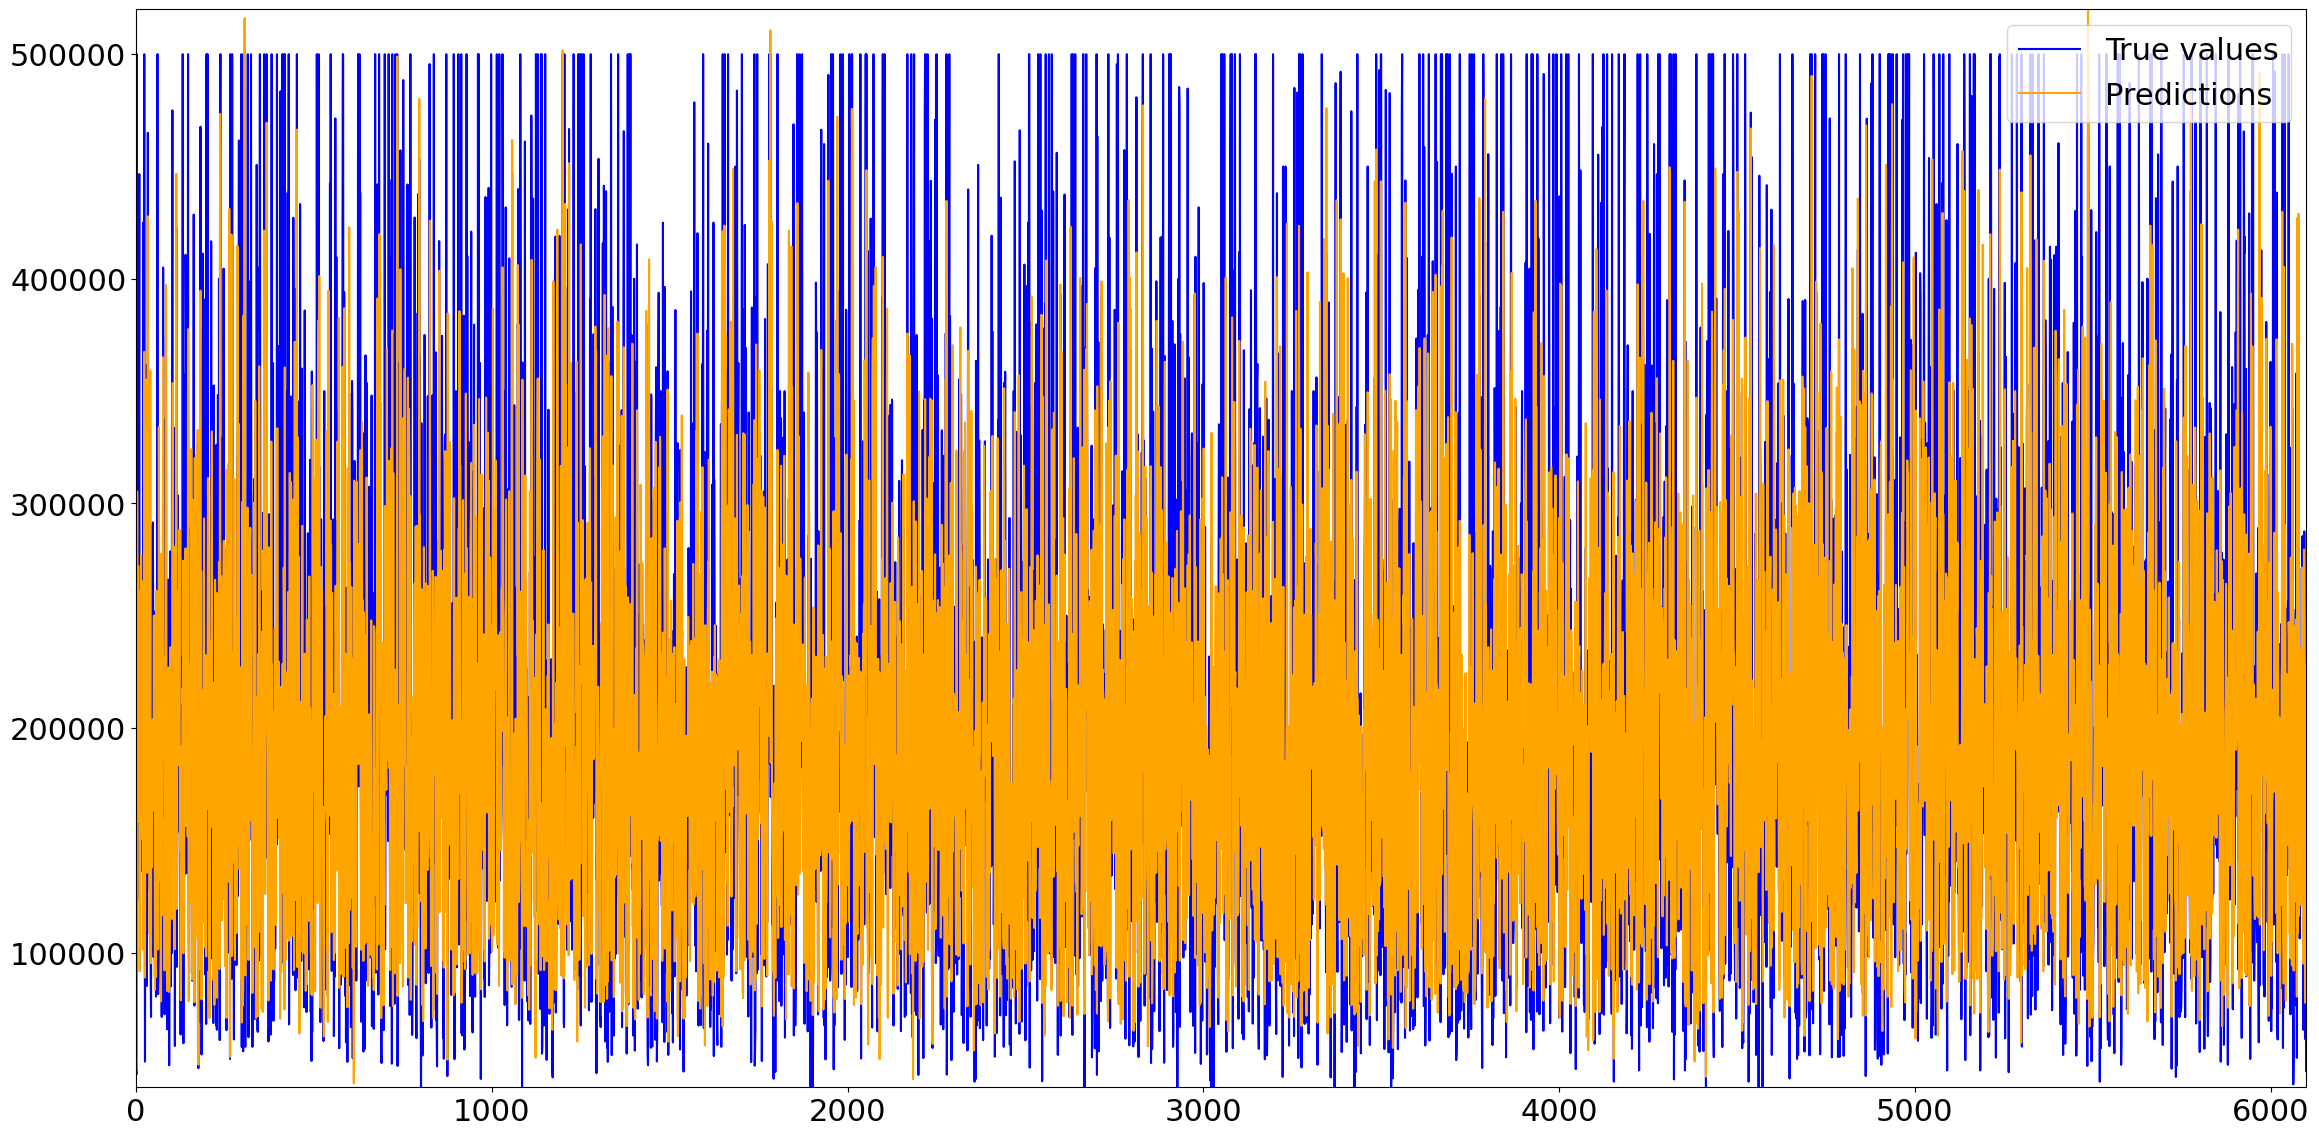

In [32]:
# Inverse the normalization to get easier interpretations of the results
y_pred = inv_boxcox(lr_regularization.predict(x_test), lmbda)

pyplot.figure(figsize=(28,14))
pyplot.plot(range(len(y_test)), y_test, color='blue', label='True values')
pyplot.plot(range(len(y_pred)), y_pred, color='orange', label='Predictions')
pyplot.xticks(fontsize=22)
pyplot.yticks(fontsize=22)
pyplot.legend(fontsize=22)
pyplot.ylim(40000, 520000)
pyplot.xlim(0, 6100)
pyplot.show();

### Residual Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


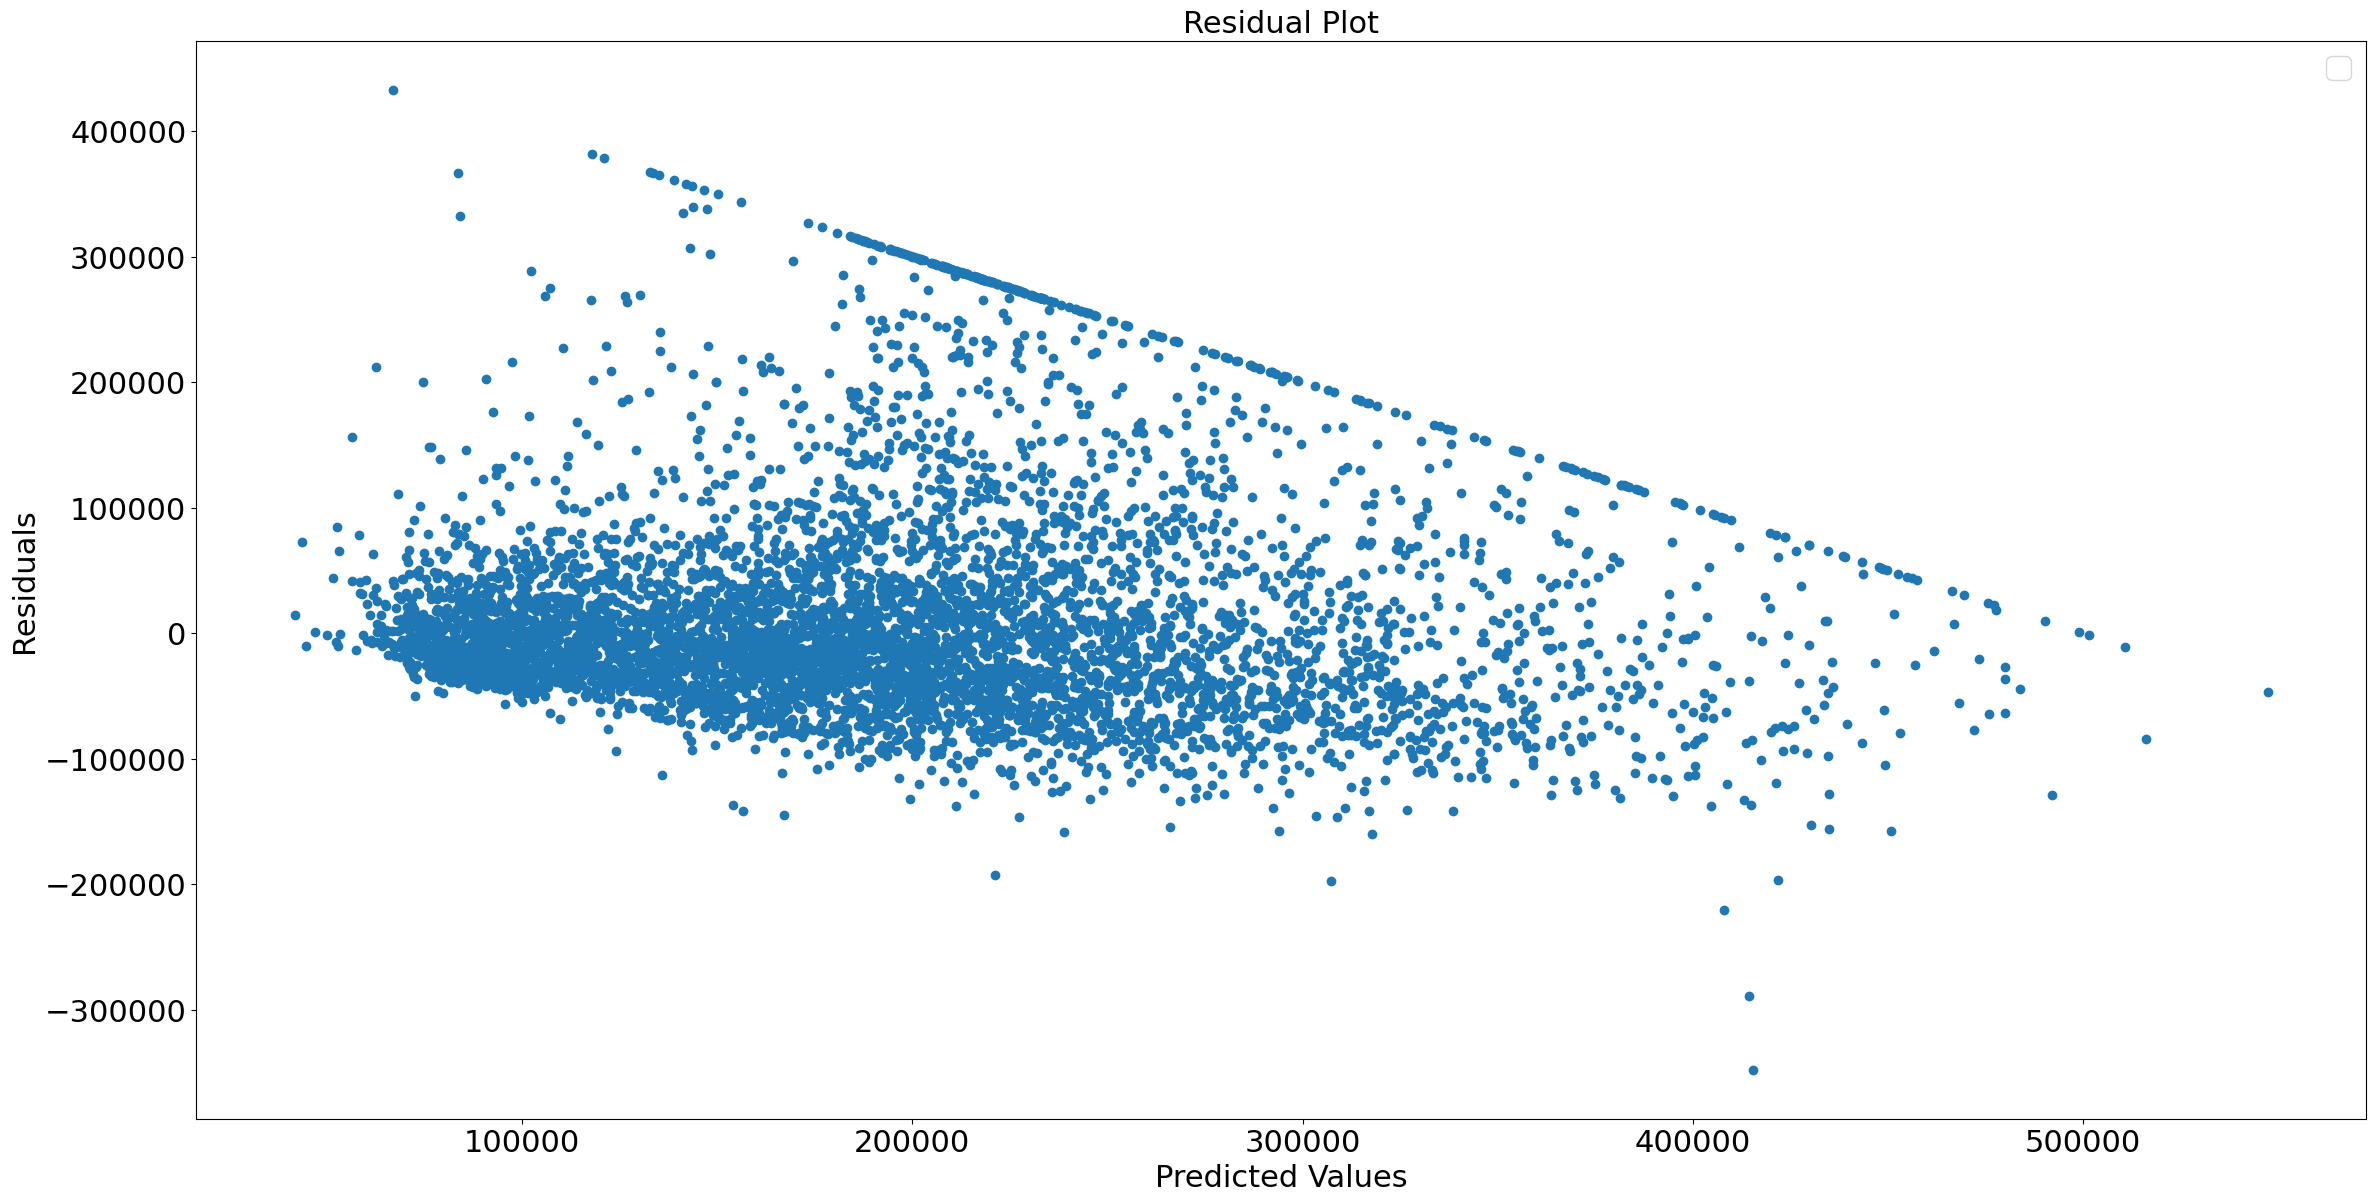

In [33]:
# Compute the residuals
residuals = numpy.subtract(y_test, y_pred)

# Plot the residuals
pyplot.figure(figsize=(28,14))
pyplot.scatter(y_pred, residuals)
pyplot.title('Residual Plot', fontsize=22)
pyplot.xlabel('Predicted Values', fontsize=22)
pyplot.ylabel('Residuals', fontsize=22)
pyplot.xticks(fontsize=22)
pyplot.yticks(fontsize=22)
pyplot.legend(fontsize=22)
pyplot.show();

### Feature Importances Plot

Creating a bar chart of the feature importances by plotting the coefficients of the linear regression model can help to identify which features are most important in predicting the response variable.

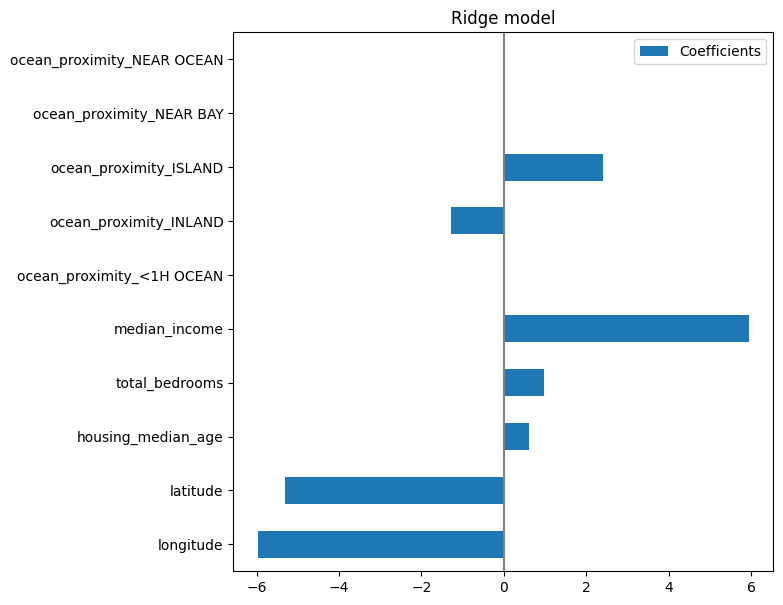

In [34]:
coefs = pandas.DataFrame(
   lr_regularization.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
pyplot.title('Ridge model')
pyplot.axvline(x=0, color='.5')
pyplot.subplots_adjust(left=.3)

# 5. Next Steps

Regarding next steps, we could explore several options:

- Feature engineering: We could try to identify additional relevant features that may explain more variance in the target variable and improve the model's performance.
- Nonlinear models: As mentioned earlier, we could explore more sophisticated models that can capture nonlinear relationships between the features and target variable.
- Outlier detection: We could analyze further if there are any outliers in the dataset that could affect the model's performance and try to remove or transform them if necessary.
- Ensemble methods: We could consider ensemble methods, such as random forests or gradient boosting, that can combine multiple models and improve their predictive power.


Overall, selecting the best model depends on the specific goals and priorities of the analysis, and additional exploration of the data and modeling techniques could provide further insights and improvements.

## Author

<p>Author: Jose Pena</p>
<p>Github: <a href="https://github.com/JoseJuan98">JoseJuan98</a></p>

## Change Log
| Date (YYYY-MM-DD) | Version | Changed By | Change Description   |
|-------------------| ------- | ---------- | -------------------- |
| 2023-01-27        | 1.0     | Jose       | First version        |
